In [28]:
import re
import PyPDF2
import os
import matplotlib.pyplot as plt
%matplotlib inline


def findIsbn(reader):
    isbn_regex = re.compile("(?:[0-9]{3}-)?[0-9]{1,5}-[0-9]{1,7}-[0-9]{1,6}-[0-9]")
    isbn = []
    index = 0
    while (True):
        index += 1
        page = reader.getPage(index).extractText()
        isbn.extend(isbn_regex.findall(page))
        if len(isbn) > 0:
            return isbn

books_pages = []
books_names = []
books = os.listdir("books")
for book in books:
    reader = PyPDF2.PdfFileReader('books/'+book)
    books_pages.append(reader.getNumPages())
    isbn = findIsbn(reader)
    newName = str(isbn.pop(0)) + '.pdf'
    books_names.append(reader.getNumPages())
    os.rename('books/'+book, 'books/' + newName)

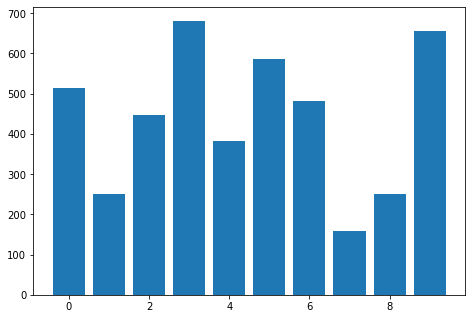

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(len(books_names)),books_pages)
plt.show()

In [24]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

class PdfConverter:

   def __init__(self, file_path):
       self.file_path = file_path
# convert pdf file to a string which has space among words 
   def convert_pdf_to_txt(self):
       rsrcmgr = PDFResourceManager()
       retstr = StringIO()
       codec = 'utf-8'  # 'utf16','utf-8'
       laparams = LAParams()
       device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
       fp = open(self.file_path, 'rb')
       interpreter = PDFPageInterpreter(rsrcmgr, device)
       password = ""
       maxpages = 0
       caching = True
       pagenos = set()
       for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password, caching=caching, check_extractable=True):
           interpreter.process_page(page)
       fp.close()
       device.close()
       str = retstr.getvalue()
       retstr.close()
       return str
# convert pdf file text to string and save as a text_pdf.txt file
   def save_convert_pdf_to_txt(self):
       content = self.convert_pdf_to_txt()
       txt_pdf = open('text_pdf.txt', 'wb')
       txt_pdf.write(content.encode('utf-8'))
       txt_pdf.close()

pdfConverter = PdfConverter(file_path='books/978-3-030-71994-4.pdf')
text_pdf = pdfConverter.convert_pdf_to_txt()
# print(text_pdf)

In [25]:
pdfConverter.save_convert_pdf_to_txt()

In [26]:
from yellowbrick.text import DispersionPlot
from yellowbrick.datasets import load_hobbies
from nltk.draw.dispersion import dispersion_plot
from nltk import FreqDist

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


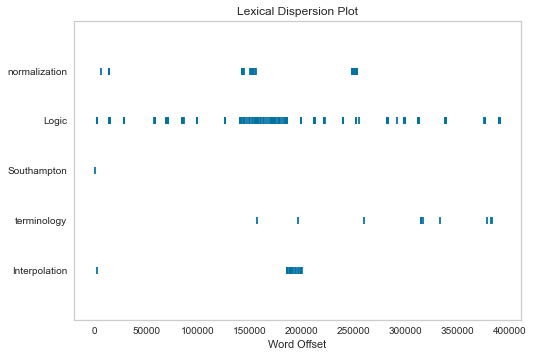

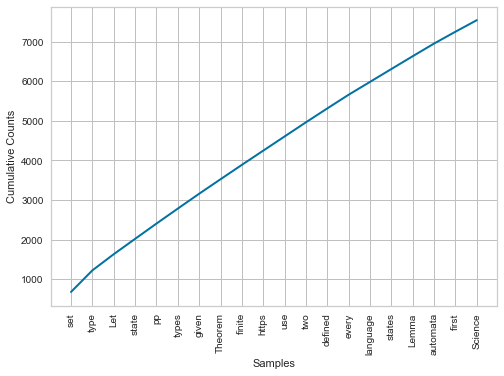

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [27]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.text import Text
from yellowbrick.text import DispersionPlot, dispersion
from yellowbrick.datasets import load_hobbies

f = open('text_pdf.txt','r',encoding="UTF-8")
full = f.read()


corpus = load_hobbies()
token = word_tokenize(full)
complete = []
complete.append(token)


# print(complete)
target_words = ['normalization','Logic','Southampton','terminology','Interpolation']


visualizer = DispersionPlot(target_words)
visualizer.fit(complete)
visualizer.show()


stop_words = set(stopwords.words())
token = word_tokenize(full)
meaningful_words = [ word for word in token if word.casefold() not in stop_words and word.isalnum() and len(word)>1 ]

freqDist = FreqDist(meaningful_words)
freqDist.plot(20, cumulative=True)